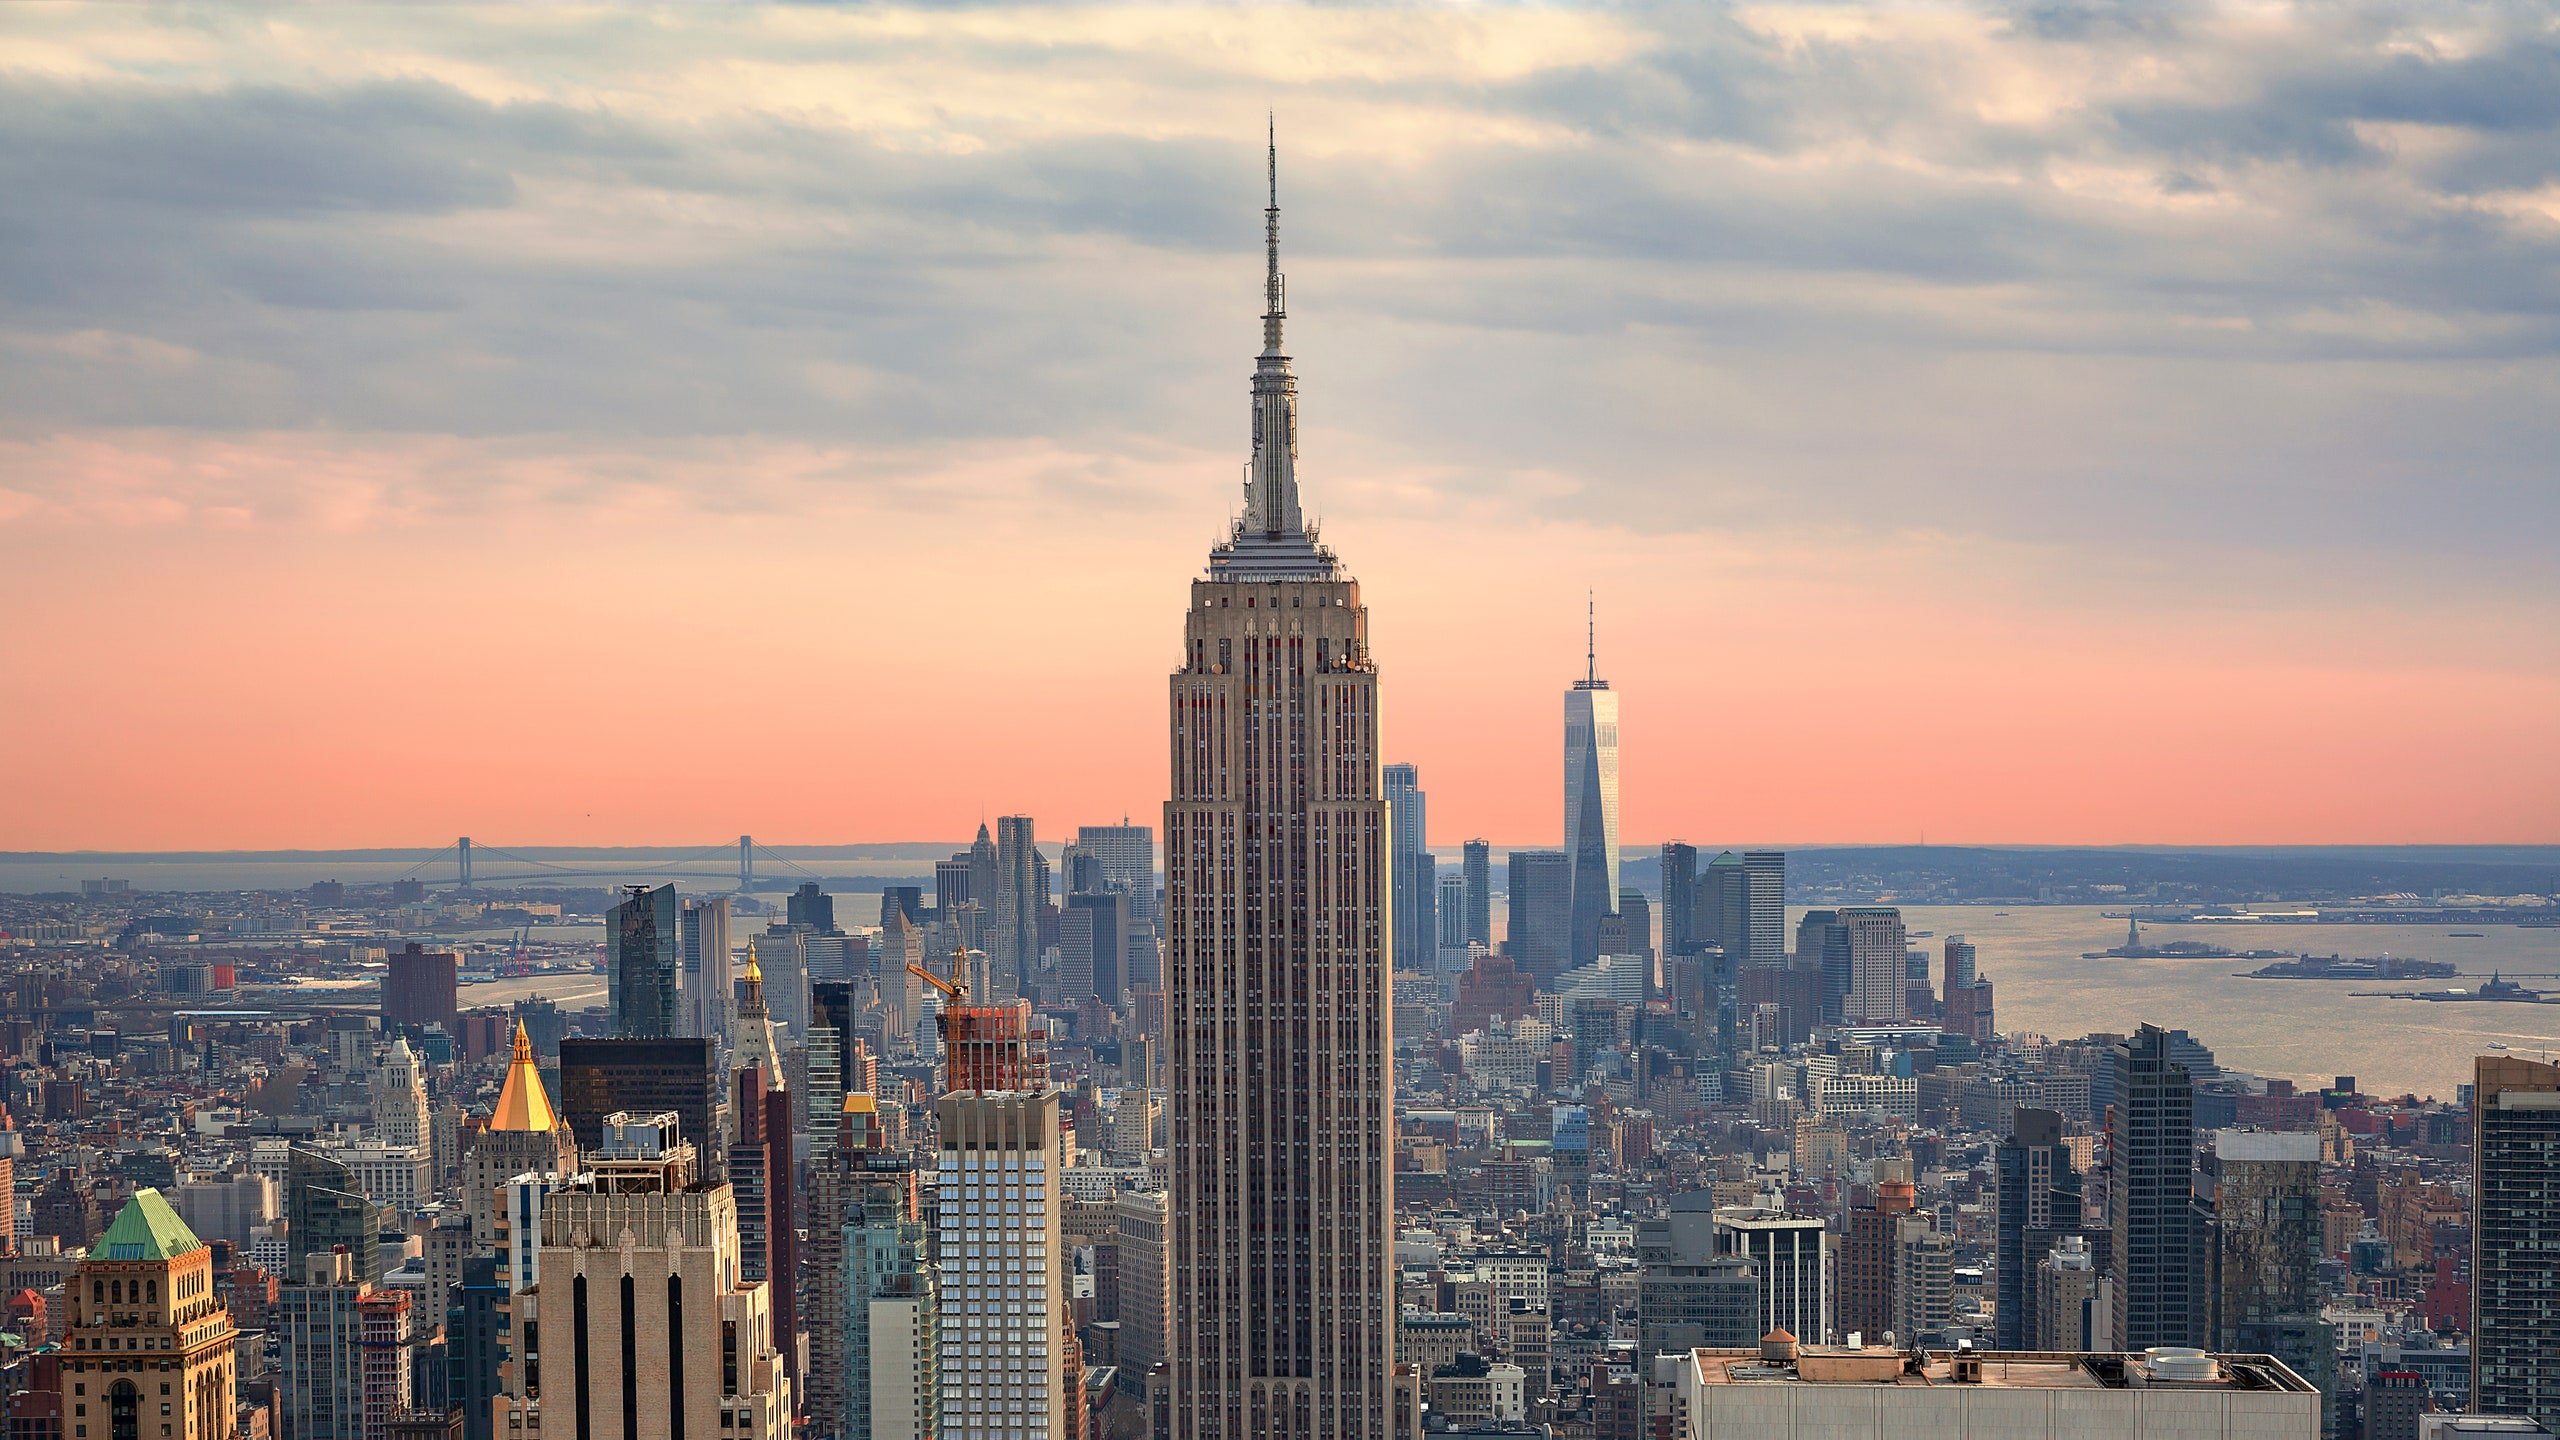

# New York Airbnb Analysis
Author: Jennifer Ha
***

## Overview 
jasd;lfjsdifjadsf;oiadj;fioasjknlkasdnf;ads

## Business Problem
 Questions to consider:
* Question 1
* Question 2
* Question 3

## Data
The dataset consists of ~21,600 rows of real estate transactions from King County, Seattle (WA) from 2014-2015. The columns represent different features associated with each property, which are outlined below. The target variable is the price of the property, which will be used in our models to determine the winning model, along with features that have strong relationships with it.

Prior to iterating regression models and predictions, I conducted some exploratory data analyses to clean up the data using IQR method to prepare it for modeling, and went through several iterations to refine the model.

### Import Libraries and Data

In [1]:
# Import all libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

# Import sklearn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RepeatedStratifiedKFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, PowerTransformer, FunctionTransformer, LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, precision_recall_curve, f1_score, auc,roc_curve, roc_auc_score
import category_encoders as ce
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score
from sklearn import metrics
#import category_encoders as ce

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix

#import optuna
#from optuna import visualization
#import xgboost as xgb

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning


# Import my personal functions 
#from functions import plot_roc_curve, clf_result_plot

# Remove scientific notation
pd.options.display.float_format = '{:,.5f}'.format

# Display all the columns without truncation
pd.set_option('display.max_columns', None)



In [2]:
# Import data into a dataframe and preview 
df = pd.read_csv('data/airbnb_nyc.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,"20,200,000,000,000.00000",8/4/21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/08,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.00000,6.00000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,1 bath,nan,1.00000,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150,30,1125,30.00000,30.00000,"1,125.00000","1,125.00000",30.00000,"1,125.00000",nan,t,6,36,66,341,8/4/21,48,0,0,11/21/09,11/4/19,4.70000,4.72000,4.62000,4.76000,4.79000,4.86000,4.41000,nan,f,3,3,0,0,0.34000
1,3831,https://www.airbnb.com/rooms/3831,"20,200,000,000,000.00000",8/4/21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,12/7/08,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.00000,1.00000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1 bath,1.00000,3.00000,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75,1,730,1.00000,1.00000,"1,125.00000","1,125.00000",1.00000,"1,125.00000",nan,t,0,1,7,212,8/4/21,408,68,0,1/5/15,6/29/21,4.46000,4.59000,4.50000,4.79000,4.81000,4.72000,4.65000,nan,f,1,1,0,0,5.09000
2,5121,https://www.airbnb.com/rooms/5121,"20,200,000,000,000.00000",8/4/21,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/09,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.00000,1.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,Na

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36722 non-null  int64  
 1   listing_url                                   36722 non-null  object 
 2   scrape_id                                     36722 non-null  float64
 3   last_scraped                                  36722 non-null  object 
 4   name                                          36709 non-null  object 
 5   description                                   35486 non-null  object 
 6   neighborhood_overview                         22590 non-null  object 
 7   picture_url                                   36722 non-null  object 
 8   host_id                                       36722 non-null  int64  
 9   host_url                                      36722 non-null 

### Duplicates
Let's start with checking duplicate values in the DataFrame.

In [4]:
# Check for duplicates
df.id.duplicated().sum()

0

Since there are no duplicates, we will move on the removing columns that we do not need for this analysis.

### Features
Remove columns that does not have any data

There are 74 features given in the original dataset. However, many of the features include IDs, URL links, dates, and repetitivd information that we do not need. I have explored each column and decided to drop these columns from the datset.

In [5]:
df.drop(['id','listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url',
        'host_id','host_url','host_name','host_since','host_location','host_about','host_response_time',
         'host_thumbnail_url','host_is_superhost','host_picture_url','host_neighbourhood','host_listings_count',
         'host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified',
         'neighbourhood','bathrooms_text','amenities','minimum_minimum_nights','maximum_minimum_nights',
         'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
         'has_availability','calendar_last_scraped','availability_30','availability_60','availability_90',
         'number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_accuracy',
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
         'review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], 
        axis=1, inplace=True)

There are also 2 empty columns with no data. Let's remove those as well.

In [6]:
# Drop columns with no data
df.drop(['calendar_updated','license'], axis=1, inplace=True)

Check how much data is left to work with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            21046 non-null  object 
 1   host_acceptance_rate          21536 non-null  object 
 2   neighbourhood_cleansed        36722 non-null  object 
 3   neighbourhood_group_cleansed  36722 non-null  object 
 4   latitude                      36722 non-null  float64
 5   longitude                     36722 non-null  float64
 6   property_type                 36722 non-null  object 
 7   room_type                     36722 non-null  object 
 8   accommodates                  36722 non-null  int64  
 9   bathrooms                     36605 non-null  float64
 10  bedrooms                      32854 non-null  float64
 11  beds                          36128 non-null  float64
 12  price                         36722 non-null  object 
 13  m

We've dropped many columns but we still have 20 columns and 36722 rows to work with.

### Columns
Description of the columns selected:



### Data Type

In [8]:
# Remove % symbol from host_response_rate column & convert the data type from object to float
# Code modified from https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
df['host_response_rate'] = df['host_response_rate'].replace('[%,]', '', regex=True).astype(float)

# Divide the values by 100
df['host_response_rate'] = df['host_response_rate']/100

In [9]:
# Remove % symbol from host_acceptance_rate column & convert the data type from object to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[%,]', '', regex=True).astype(float)

# Divide the values by 100
df['host_acceptance_rate'] = df['host_acceptance_rate']/100

In [10]:
#convert currency with $ to integer
# Code from https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# Check if the values in host_response_rate, price are showing up as intended
df.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,nan,nan,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,nan,1.00000,150.00000,30,1125,341,48,4.70000,0.34000
1,0.50000,0.88000,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1.00000,3.00000,75.00000,1,730,212,408,4.46000,5.09000
2,1.00000,nan,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,1.00000,1.00000,60.00000,30,730,365,50,4.52000,0.55000
3,0.88000,0.33000,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.50000,2.00000,2.00000,275.00000,5,1125,184,1,5.00000,0.01000
4,1.00000,1.00000,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.00000,1.00000,1.00000,61.00000,2,14,255,485,4.20000,3.63000


In [12]:
# Check data type again to ensure each column now has the correct data type to work with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            21046 non-null  float64
 1   host_acceptance_rate          21536 non-null  float64
 2   neighbourhood_cleansed        36722 non-null  object 
 3   neighbourhood_group_cleansed  36722 non-null  object 
 4   latitude                      36722 non-null  float64
 5   longitude                     36722 non-null  float64
 6   property_type                 36722 non-null  object 
 7   room_type                     36722 non-null  object 
 8   accommodates                  36722 non-null  int64  
 9   bathrooms                     36605 non-null  float64
 10  bedrooms                      32854 non-null  float64
 11  beds                          36128 non-null  float64
 12  price                         36722 non-null  float64
 13  m

### Weighted Review Scores Rating
For this analysis, we are going to calculate weighted review score rating for each listing so that we can reward listings with more number of reviews and penalize listings with less number of reviews.

For example, imagine that a guest is considering to choose between two listings, one with 4.4 review score with 956 reivews and the other with 4.6 reivew score with 50 reviews. In such case, the first listing is definitely more valuable than the later one, and we want to quantify this using the weghted review score rating.

In [13]:
# Weighted Average calculation formula from https://ask.metafilter.com/297820/Excel-Formula-to-Weight-Ratings-By-Number-of-Ratings
# (2.5*'review_score'/5)+2.5*(1-EXP(-number_of_reviews/100))
df['weighted_review_scores_rating'] = (2.5* df['review_scores_rating']/5)+2.5*(1-np.exp(-df['number_of_reviews']/100))

In [14]:
# Check DataFrame to confirm the weighted average has been calculated correclty
df.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,weighted_review_scores_rating
0,nan,nan,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,nan,1.00000,150.00000,30,1125,341,48,4.70000,0.34000,3.30304
1,0.50000,0.88000,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1.00000,3.00000,75.00000,1,730,212,408,4.46000,5.09000,4.68773
2,1.00000,nan,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,1.00000,1.00000,60.00000,30,730,365,50,4.52000,0.55000,3.24367
3,0.88000,0.33000,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.50000,2.00000,2.00000,275.00000,5,1125,184,1,5.00000,0.01000,2.52488
4,1.00000,1.00000,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.00000,1.00000,1.00000,61.00000,2,14,255,485,4.20000,3.63000,4.58043


### Distribution

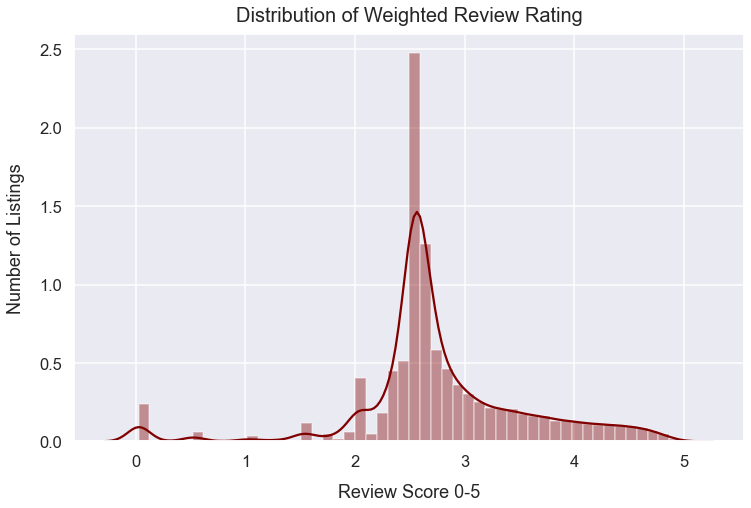

In [15]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.distplot(df['weighted_review_scores_rating'], color="maroon")
plt.xlabel("Review Score 0-5", labelpad=14)
plt.ylabel("Number of Listings", labelpad=14)
plt.title("Distribution of Weighted Review Rating", y=1.015, fontsize=20);

### Converting `weighted_review_scores_rating` to Binomial

In [16]:
df.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,weighted_review_scores_rating
count,"21,046.00000","21,536.00000","36,722.00000","36,722.00000","36,722.00000","36,605.00000","32,854.00000","36,128.00000","36,722.00000","36,722.00000","36,722.00000","36,722.00000","36,722.00000","27,307.00000","27,307.00000","27,307.00000"
mean,0.86331,0.75619,40.72936,-73.94958,2.80036,1.16033,1.32918,1.53219,159.90480,22.48317,"60,242.37272",122.56783,22.85575,4.57496,1.37551,2.77208
std,0.27210,0.30420,0.05556,0.04961,1.86809,0.45415,0.72270,1.11270,292.18352,28.36192,"11,207,377.70290",138.76765,49.18965,0.86400,3.85031,0.78850
min,0.00000,0.00000,40.50863,-74.24135,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.01000,0.02488
25%,0.90000,0.64000,40.68953,-73.98317,2.00000,1.00000,1.00000,1.00000,67.00000,3.00000,60.00000,0.00000,0.00000,4.56000,0.11000,2.52488
50%,1.00000,0.89000,40.72553,-73.95499,2.00000,1.00000,1.00000,1.00000,108.00000,30.00000,"1,125.00000",57.00000,4.00000,4.82000,0.42000,2.61964
75%,1.00000,0.99000,40.76275,-73.93133,4.00000,1.00000,1.00000,2.00000,175.00000,30.00000,"1,125.00000",259.00000,19.00000,5.00000,1.45000,3.07138
max,1.00000,1.00000,40.91139,-73.70522,16.00000,8.00000,13.00000,24.00000,"10,000.00000","1,250.00000","2,147,483,647.00000",365.00000,998.00000,5.00000,192.93000,4.96476


In [17]:
df['weighted_review_scores_rating'] = np.where(df['weighted_review_scores_rating'] > 2.82817, 1,0)

In [18]:
pd.DataFrame(df.weighted_review_scores_rating.value_counts())

,weighted_review_scores_rating
0,27532
1,9190


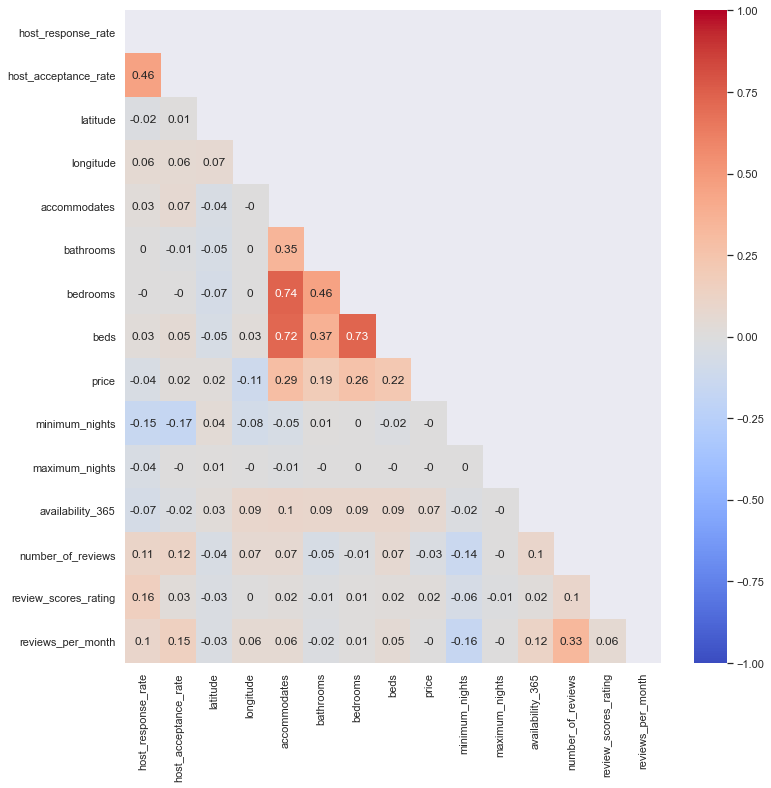

In [19]:
# Drop price to only show correlation between independent variables
corr = df.drop('weighted_review_scores_rating', axis=1).corr().round(2)


# Create mask for upper triangle of matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


# Create heatmap correlation matrix
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1,mask=mask);

### Preprocessing

In [21]:
X = df.drop('weighted_review_scores_rating', axis=1)
y = df['weighted_review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [22]:
# Below is code from Lindsey. Creates empty lists for different column types
num_cols = []
ohe_cols = []
freq_cols = []

# Loop through the columns and append col to proper list
for col in X_train.columns:
    # Numeric columns
    if X_train[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
        
    # Columns with more than 10 unique values
    elif len(X_train[col].unique()) > 10:
        ohe_cols.append(col)
            
    # Columns with fewer than 10 unique values
    else:
        freq_cols.append(col)          

In [23]:
#preprocessing steps
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohencoder', OneHotEncoder(handle_unknown='ignore'))])

freq_transformer = Pipeline(steps=[
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('freq_enc', ce.count.CountEncoder(normalize=True, 
                                       handle_unknown=0,
                                       min_group_size=0.001,
                                       min_group_name='Other'))])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)])

In [25]:
# Code modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
def clf_result_plot(clf, x_train, y_train, x_test, y_test):
        """
        Add Description
        """
        # Predict the train and test data
        train_pred = clf.predict(x_train)
        test_pred = clf.predict(x_test)
        
        # Plot the confusion matrix
        plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues, xticks_rotation=30)
        plt.title('Testing Set Confusion Matrix')
        plt.show(); 

        print("Accuracy", metrics.accuracy_score(y_test, test_pred))

        print(classification_report(y_test, test_pred))
        
        # Plot ROC Curve
        auc = roc_auc_score(y_test, test_pred)
        print("AUC Score: ")
        print(auc)

        fpr, tpr, thresholds = roc_curve(y_test, test_pred)
        plot_roc_curve(fpr, tpr)

## Model 1: Logistic Regression

In [26]:
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='sag'))])
clf_logreg.fit(X_train,y_train);

/Users/jenniferha/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


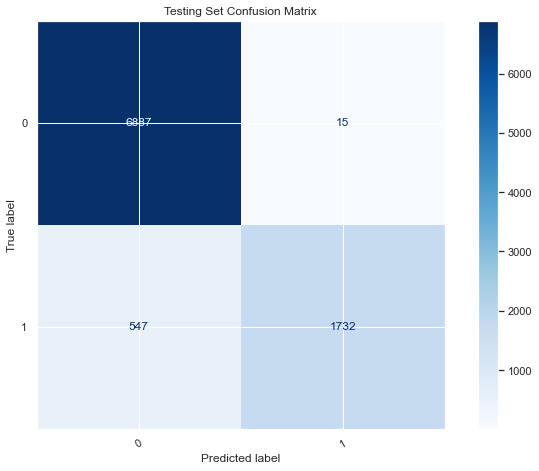

Accuracy 0.9387866245507025
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6902
           1       0.99      0.76      0.86      2279

    accuracy                           0.94      9181
   macro avg       0.96      0.88      0.91      9181
weighted avg       0.94      0.94      0.94      9181

AUC Score: 
0.8789045826679767


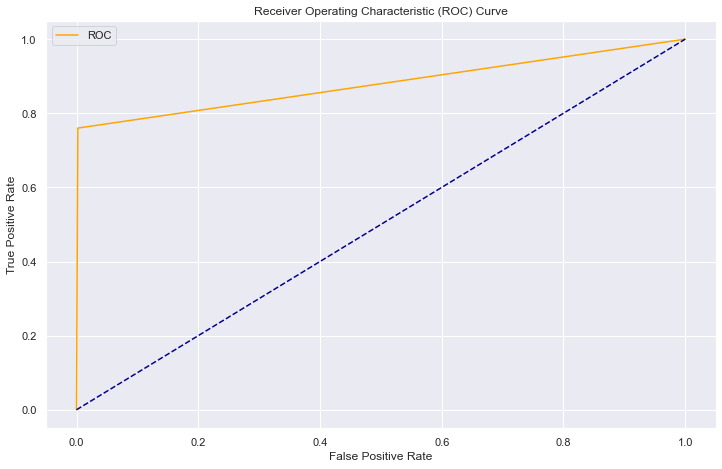

In [27]:
clf_result_plot(clf_logreg, X_train, y_train, X_test, y_test)

Maybe in the presentation for the best model?
The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your dataset

## Model 2: K-Nearest Neighbors (KNN)

In [28]:
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),
                          ('knn', KNeighborsClassifier())])

clf_knn.fit(X_train,y_train);

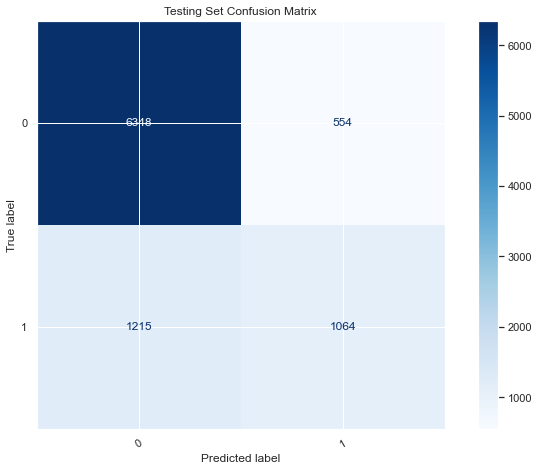

Accuracy 0.8073194641106634
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6902
           1       0.66      0.47      0.55      2279

    accuracy                           0.81      9181
   macro avg       0.75      0.69      0.71      9181
weighted avg       0.79      0.81      0.80      9181

AUC Score: 
0.6933024227227318


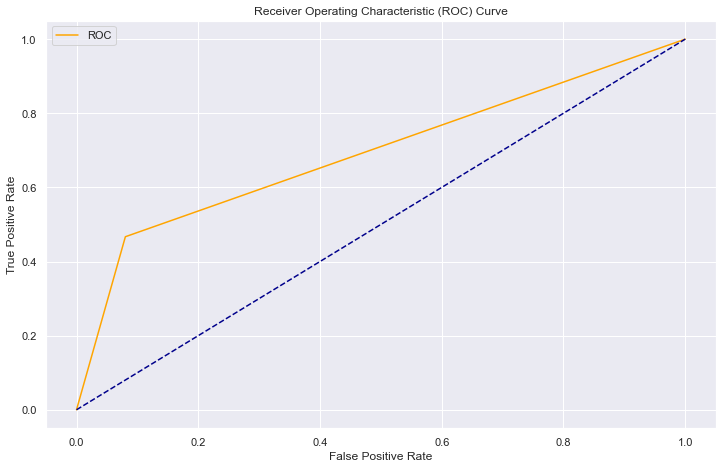

In [29]:
clf_result_plot(clf_knn, X_train, y_train, X_test, y_test)

## Model 3: Decision Tree

In [32]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])
clf_dt.fit(X_train,y_train);

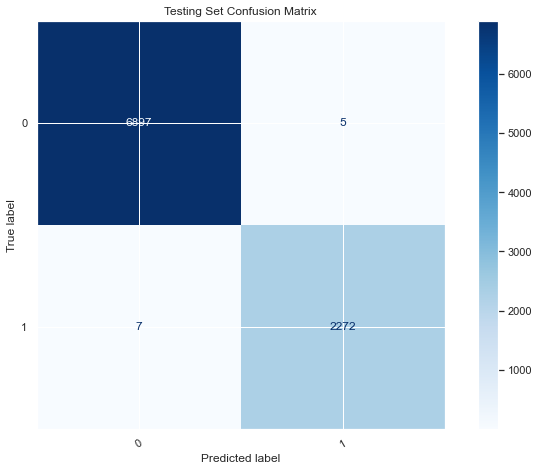

Accuracy 0.9986929528373816
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6902
           1       1.00      1.00      1.00      2279

    accuracy                           1.00      9181
   macro avg       1.00      1.00      1.00      9181
weighted avg       1.00      1.00      1.00      9181

AUC Score: 
0.9981020248501271


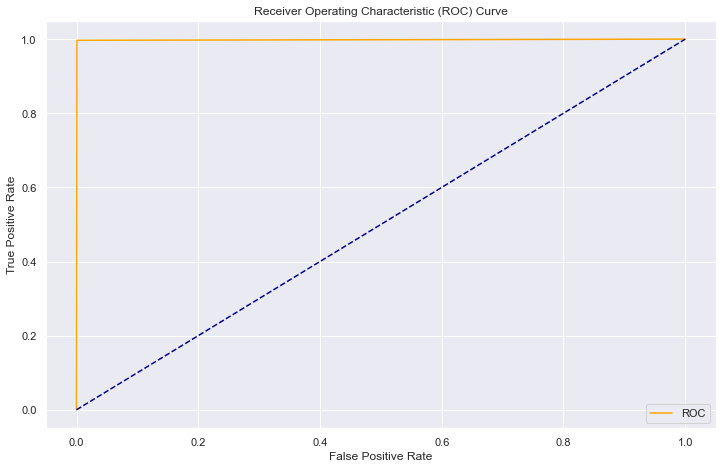

In [33]:
clf_result_plot(clf_dt, X_train, y_train, X_test, y_test)

### Model 4: Suppor Vector Machine (SVM)

In [38]:
svc_clf_rbf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', SVC(kernel='rbf'))])

svc_clf_rbf.fit(X_train, y_train);

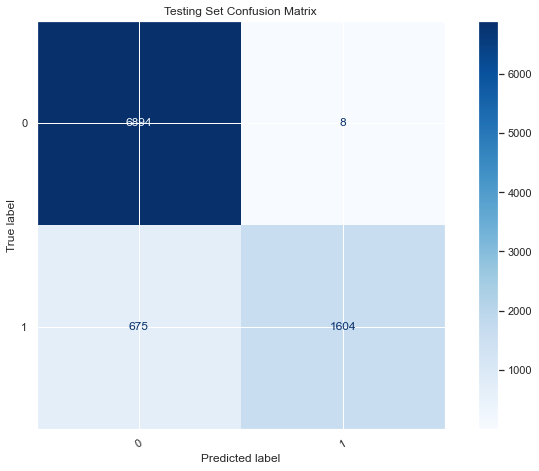

Accuracy 0.9256072323276332
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6902
           1       1.00      0.70      0.82      2279

    accuracy                           0.93      9181
   macro avg       0.95      0.85      0.89      9181
weighted avg       0.93      0.93      0.92      9181

AUC Score: 
0.8513291897382639


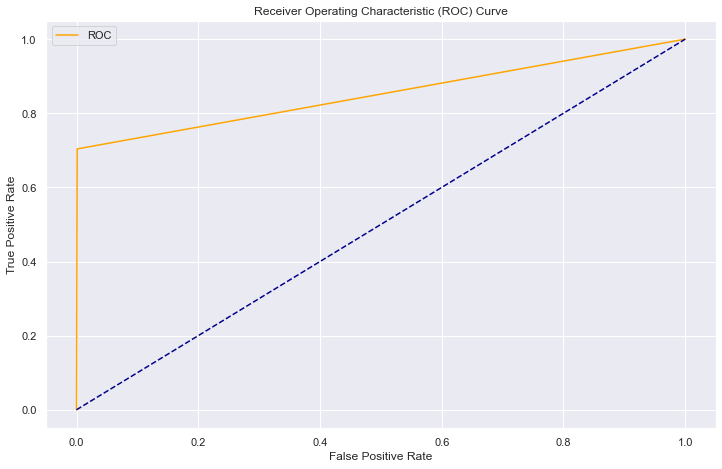

In [39]:
clf_result_plot(svc_clf_rbf, X_train, y_train, X_test, y_test)

In [40]:
svc_clf_linear = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', SVC(kernel='linear'))])

svc_clf_linear.fit(X_train, y_train);

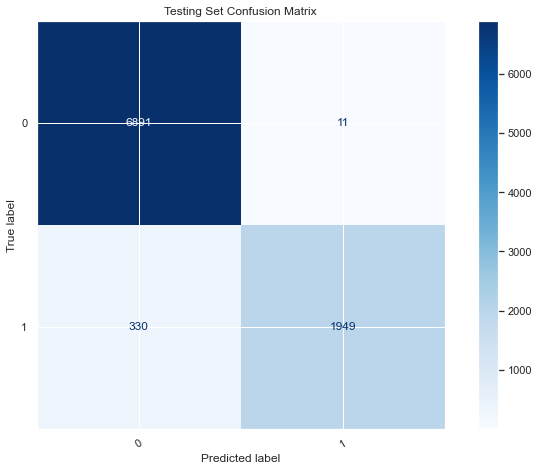

Accuracy 0.962858076462259
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6902
           1       0.99      0.86      0.92      2279

    accuracy                           0.96      9181
   macro avg       0.97      0.93      0.95      9181
weighted avg       0.96      0.96      0.96      9181

AUC Score: 
0.9268029540120962


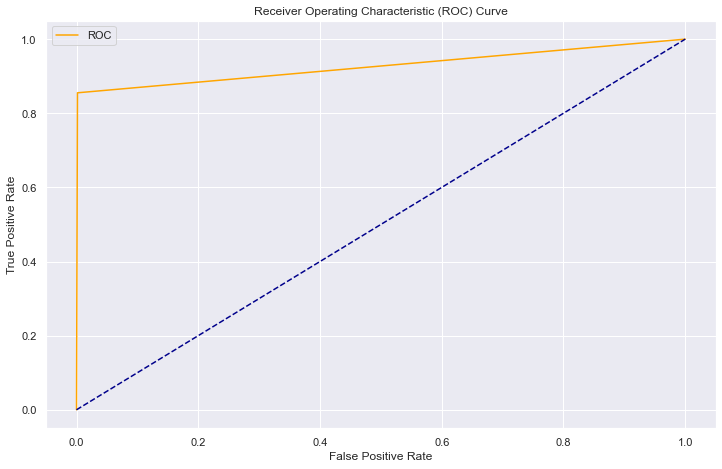

In [41]:
clf_result_plot(svc_clf_linear, X_train, y_train, X_test, y_test)

In [44]:
svc_clf_sigmoid = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', SVC(kernel='sigmoid'))])

svc_clf_sigmoid.fit(X_train, y_train);

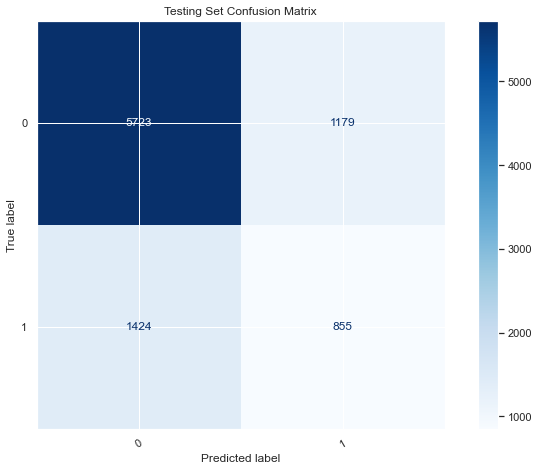

Accuracy 0.716479686308681
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6902
           1       0.42      0.38      0.40      2279

    accuracy                           0.72      9181
   macro avg       0.61      0.60      0.61      9181
weighted avg       0.71      0.72      0.71      9181

AUC Score: 
0.602172246847325


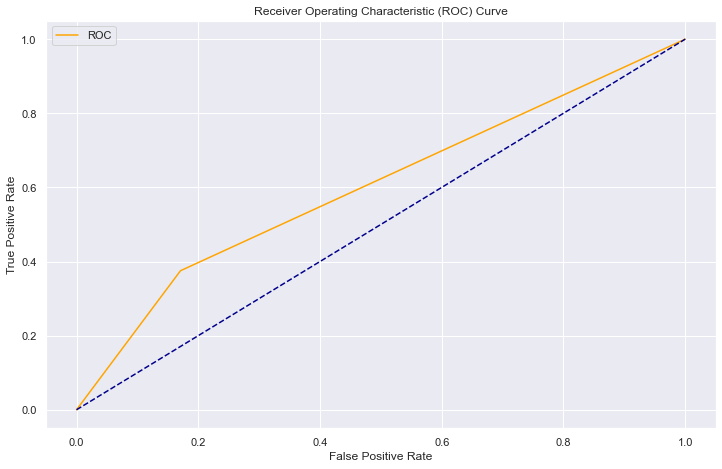

In [45]:
clf_result_plot(svc_clf_sigmoid, X_train, y_train, X_test, y_test)

## Conclusion